<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/04_inferencia_01_conceitos_basicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

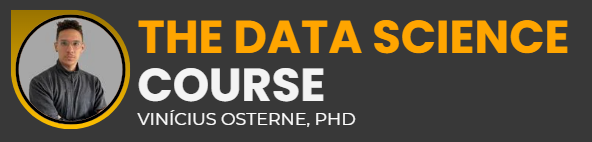

---

# Inferência Estatística - Conceitos Básicos

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from ipywidgets import interact

# 📊 Fundamentos da Inferência Estatística

Nesta aula, vamos introduzir os conceitos fundamentais da inferência estatística:

1. Considerações Iniciais  
2. População e Amostra  
3. Parâmetro e Espaço Paramétrico  

Vamos trabalhar com simulações, gráficos e exercícios para tornar o aprendizado mais intuitivo.


---

## 🌌 Considerações Iniciais

Antes de realizar qualquer inferência, precisamos entender o "universo" onde o problema está inserido:

- **Fenômeno Aleatório:** um processo cujo resultado não é determinístico.  
- **Experimento Estatístico:** procedimento que gera dados observáveis.  
- **Variável Aleatória:** representação numérica de um fenômeno aleatório.  
- **Dados Observados:** resultados coletados do experimento.   


In [ ]:
# Exemplo: Lançamento de um dado
## Fenômeno aleatório: lançamento do dado.
## Experimento estatístico: lançar o dado 10 vezes e registrar resultados.
## Variável aleatória: número que sai na face superior.
## Dados Observados:
np.random.seed(42)
face_do_dado = np.random.randint(1, 7, size=10)
face_do_dado

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5])

In [ ]:
# Exemplo: Sorteio de cartas de um baralho
## Fenômeno aleatório: retirada de cartas sem reposição.
## Experimento estatístico: sortear 5 cartas de um baralho de 52.
## Variável aleatória: naipe ou valor da carta retirada.
## Dados Observados:
random.seed(42)
baralho = [f"{valor} de {naipe}"
           for valor in ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
           for naipe in ['Copas', 'Ouros', 'Paus', 'Espadas']]

sorteio_cartas = random.sample(baralho, 5)
sorteio_cartas

['J de Copas', '2 de Espadas', 'A de Ouros', 'Q de Espadas', '5 de Ouros']

In [ ]:
# Exemplo: Lançamento de moeda
## Fenômeno aleatório: jogar uma moeda.
## Experimento estatístico: lançar a moeda 15 vezes.
## Variável aleatória: resultado do lançamento (Cara ou Coroa).
## Dados Observados:
np.random.seed(42)
resultados_moeda = np.random.choice(['Cara', 'Coroa'], size=15)
resultados_moeda

array(['Cara', 'Coroa', 'Cara', 'Cara', 'Cara', 'Coroa', 'Cara', 'Cara',
       'Cara', 'Coroa', 'Cara', 'Cara', 'Cara', 'Cara', 'Coroa'],
      dtype='<U5')

In [ ]:
# Exemplo: Tempo de atendimento em um caixa eletrônico
## Fenômeno aleatório: duração do atendimento de clientes.
## Experimento estatístico: medir o tempo de 20 atendimentos consecutivos.
## Variável aleatória: tempo de atendimento em minutos.
## Dados Observados:
np.random.seed(42)
tempos_atendimento = np.random.exponential(scale=5, size=20)
np.round(tempos_atendimento, 2)

array([ 2.35, 15.05,  6.58,  4.56,  0.85,  0.85,  0.3 , 10.06,  4.6 ,
        6.16,  0.1 , 17.52,  8.93,  1.19,  1.  ,  1.01,  1.81,  3.72,
        2.83,  1.72])

In [ ]:
# Exemplo: Número de chamadas recebidas por um call center
## Fenômeno aleatório: quantidade de ligações recebidas por hora.
## Experimento estatístico: contar o número de chamadas em 12 horas.
## Variável aleatória: número de chamadas por hora.
## Dados Observados:
np.random.seed(42)
chamadas_por_hora = np.random.poisson(lam=8, size=12)
chamadas_por_hora

array([ 6,  7,  6,  7,  7,  6, 11,  4,  8,  6,  6, 12])

---

## 👥 População e Amostra

- **População:** conjunto completo de elementos de interesse (todos os dados possíveis).  
- **Amostra:** subconjunto da população, coletado para fazer inferências.  

🔹 Exemplo:
- População: todas as alturas de adultos em um país.  
- Amostra: alturas de 100 pessoas selecionadas aleatoriamente.

Objetivo: usar a **amostra** para aprender sobre a **população**.


In [ ]:
def sample_visual(n=50):
    amostra_local = np.random.choice(populacao, size=n, replace=False)
    plt.figure(figsize=(10,5))
    plt.hist(populacao, bins=30, alpha=0.3, label=f'População (N={len(populacao)})')
    plt.hist(amostra_local, bins=10, alpha=0.8, label=f'Amostra (n={n})')
    plt.axvline(populacao.mean(), color='blue', linestyle='dashed', linewidth=2, label='Média População')
    plt.axvline(amostra_local.mean(), color='red', linestyle='dashed', linewidth=2, label='Média Amostra')
    plt.legend()
    plt.title(f"População vs Amostra\n(N={len(populacao)} | n={n})")
    plt.xlabel("Altura (cm)")
    plt.ylabel("Frequência")
    plt.show()

interact(sample_visual, n=(10, 5000, 10))

interactive(children=(IntSlider(value=50, description='n', max=5000, min=10, step=10), Output()), _dom_classes…

<function __main__.sample_visual(n=50)>

---

## 🔑 Parâmetro e Espaço Paramétrico

- **Parâmetro:** valor fixo (geralmente desconhecido) que descreve uma característica da população.  
  Ex.: média $\mu$, variância $\sigma^2$, proporção $p$.

- **Espaço Paramétrico:** conjunto de todos os valores possíveis para o parâmetro.  
  - Para média: $\Theta = (-\infty, \infty)$  
  - Para variância: $\Theta = (0, \infty)$  
  - Para proporção: $\Theta = [0, 1]$

🎯 Inferência estatística = aprender sobre o parâmetro com base em uma amostra.


In [ ]:
def plot_distribution(mu=170, sigma=10):
    x = np.linspace(130, 210, 1000)
    y = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu)/sigma)**2)
    plt.figure(figsize=(8,4))
    plt.plot(x, y)
    plt.title(f"Distribuição Normal (μ={mu}, σ={sigma})")
    plt.xlabel("Altura (cm)")
    plt.ylabel("Densidade")
    plt.show()

interact(plot_distribution, mu=(-150, 150, 1), sigma=(0, 20, 1))

interactive(children=(IntSlider(value=150, description='mu', max=150, min=-150), IntSlider(value=10, descripti…

<function __main__.plot_distribution(mu=170, sigma=10)>

---

# ✅ Conclusão

- Um fenômeno aleatório gera dados que analisamos com estatística.
- A população é o conjunto completo; a amostra é uma parte usada para inferir.
- Parâmetros descrevem características da população.
- O espaço paramétrico é o conjunto de valores possíveis para esses parâmetros.
